### **Importing  the Librairies**

In [ ]:
# Install nightly package for some functionalities that aren't in alpha
!pip install tf-nightly-gpu-2.0-preview
!pip install tf-hub-nightly
!pip install tensorflow==2.0.0-alpha

# Install TF Hub for TF2
!pip install 'tensorflow-hub == 0.5'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tf-nightly-gpu-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-gpu-2.0-preview
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 35.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-alpha (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from time import time
import numpy as np




In [ ]:
# verify TensorFlow version

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")


Version:  2.8.2
Eager mode:  True
Hub version:  0.5.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


### Load the data




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file = tf.keras.utils.get_file(origin='https://github.com/AveyBD/rice-leaf-diseases-detection/raw/master/rice-leaf.zip', 
                                   fname='rice-leaf.zip', extract=True)
!unzip /content/drive/MyDrive/Work/rice-leaf.zip;


7831552/7816855 [==============================] - 0s 0us/step
Archive:  /content/drive/MyDrive/Work/rice-leaf.zip
  inflating: rice/validation/brownspot/brownspot_rotated_009.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_017.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_007.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_014.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_008.png  
  inflating: rice/validation/brownspot/brownspot_rotated_001.jpg  
  inflating: rice/train/blast/blast_rotated_042.png  
  inflating: rice/validation/brownspot/brownspot_rotated_005.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_003.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_013.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_011.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_010.jpg  
  inflating: rice/validation/brownspot/brownspot_rotated_016.jpg  
  inflating: rice/train/bla

### Prepare training and validation  dataset


In [ ]:
data_dir = os.path.join(os.path.dirname("/content/drive/MyDrive/Work/rice/"))
print(data_dir)
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
print(train_dir)
print(validation_dir)
#E:\Downloads\rice-leaf-diseases-detection-master\rice-leaf-diseases-detection-master\rice-leaf\rice\validation

/content/drive/MyDrive/Work/rice
/content/drive/MyDrive/Work/rice/train
/content/drive/MyDrive/Work/rice/validation


In [ ]:
import time
import os
from os.path import exists

def count(dir, counter=0):
    "returns number of files in dir and subdirs"
    for pack in os.walk(dir):
        for f in pack[2]:
            counter += 1
    return dir + " : " + str(counter) + "files"



In [ ]:
print('total images for training :', count(train_dir))
print('total images for validation :', count(validation_dir))


total images for training : /content/drive/MyDrive/Work/rice/train : 157files
total images for validation : /content/drive/MyDrive/Work/rice/validation : 84files


### Label mapping


In [ ]:
!!wget https://github.com/AveyBD/rice-leaf-diseases-detection/archive/master.zip
!unzip master.zip;

Archive:  master.zip
e56f0a072757582b0c8e6db762a720860b8da342
   creating: rice-leaf-diseases-detection-master/
  inflating: rice-leaf-diseases-detection-master/README.md  
  inflating: rice-leaf-diseases-detection-master/Rice_Leaf_Detection.ipynb  
  inflating: rice-leaf-diseases-detection-master/Rice_Leaf_Detection_Colab.ipynb  
  inflating: rice-leaf-diseases-detection-master/classes.json  
  inflating: rice-leaf-diseases-detection-master/rice-leaf.zip  


In [ ]:
import json

with open('/content/rice-leaf-diseases-detection-master/classes.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())
    
print (classes)

['Bacterial_leaf_blight', 'blast', 'brownspot']


In [ ]:
print('Number of classes:',len(classes))

Number of classes: 3


In [ ]:
pixels= 224
FV_SIZE = 2048

IMAGE_SIZE = (pixels, pixels)


BATCH_SIZE = 32 #@param {type:"integer"}

### Data Preprocessing




In [ ]:
# Inputs are suitably resized for the selected module. Dataset augmentation (i.e., random distortions of an image each time it is read) improves training, esp. when fine-tuning.

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

do_data_augmentation = True #@param {type:"boolean"}
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen
  
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 84 images belonging to 3 classes.
Found 157 images belonging to 3 classes.


###Build the model


In [ ]:
 
def fire_block(x, squeeze_filters, expand_filters):
    squeezed = Conv2D(filters=squeeze_filters,
                      kernel_size=1,
                      activation='relu')(x)
    expanded_1x1 = Conv2D(filters=expand_filters,
                        kernel_size=1,
                        activation='relu')(squeezed)
    expanded_3x3 = Conv2D(filters=expand_filters,
                        kernel_size=3,
                        padding='same',
                        activation='relu')(squeezed)
 
    output = Concatenate()([expanded_1x1, expanded_3x3])
    return output
 
 
input = Input([224, 224, 3])
 
x = Conv2D(96, 7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(3, strides=2, padding='same')(x)
 
 
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=16, expand_filters=64)
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
 
x = fire_block(x, squeeze_filters=32, expand_filters=128)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=48, expand_filters=192)
x = fire_block(x, squeeze_filters=64, expand_filters=256)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
 
x = fire_block(x, squeeze_filters=64, expand_filters=256)
 
 
x = Conv2D(filters=3, kernel_size=1)(x)
x = GlobalAvgPool2D()(x)
 
output = Activation('softmax')(x)
 

model = Model(input, output)


K.clear_session()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 96  14208       ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 96)   0           ['conv2d[0][0]']                 
                                                                                              

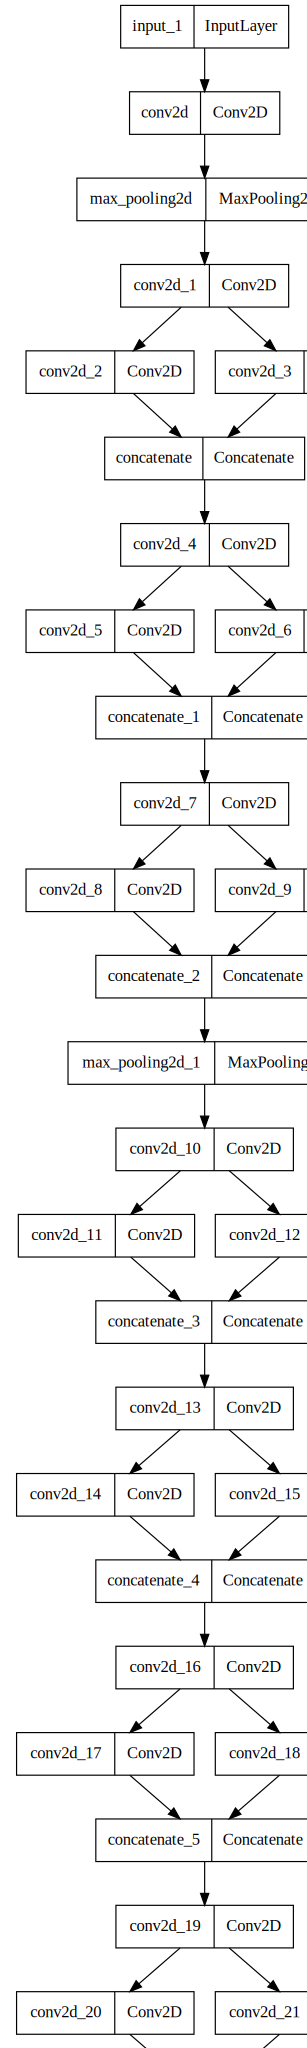

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Specify Loss Function and Optimizer

In [ ]:
#Compile model specifying the optimizer learning rate

LEARNING_RATE = 0.001 #@param {type:"number"}

model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE), 
   loss='categorical_crossentropy',
   metrics=['accuracy'])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Train Model


In [ ]:

EPOCHS=150 #@param {type:"integer"}
# print(train_generator.samples)
# print(train_generator.batch_size)
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples//train_generator.batch_size,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples//validation_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/150
4/4 [==============================] - 20s 991ms/step - loss: 1.0884 - accuracy: 0.4320 - val_loss: 1.2329 - val_accuracy: 0.0000e+00
Epoch 2/150
4/4 [==============================] - 3s 715ms/step - loss: 1.0228 - accuracy: 0.4960 - val_loss: 1.1181 - val_accuracy: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 3s 699ms/step - loss: 1.0653 - accuracy: 0.4960 - val_loss: 1.1126 - val_accuracy: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 3s 687ms/step - loss: 1.0550 - accuracy: 0.4800 - val_loss: 1.1279 - val_accuracy: 0.0000e+00
Epoch 5/150
4/4 [==============================] - 3s 704ms/step - loss: 1.0168 - accuracy: 0.5156 - val_loss: 1.2838 - val_accuracy: 0.0000e+00
Epoch 6/150
4/4 [==============================] - 3s 713ms/step - loss: 1.0109 - accuracy: 0.5120 - val_loss: 1.2912 - val_accuracy: 0.0000e+00
Epoch 7/150
4/4 [==============================] - 3s 690ms/step - loss: 0.9797 - accuracy: 0.5200 - val_loss: 1.3086 - val_accur

###Check Performance


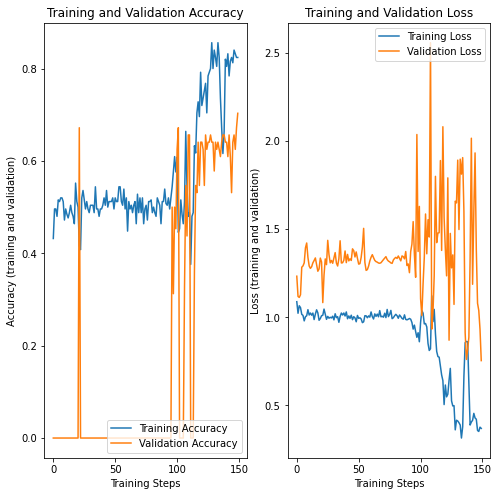

In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

### Random test


In [ ]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob


def load_image(filename):
    img = cv2.imread(os.path.join(data_dir, validation_dir, filename))
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    
    return img


def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

SOURCE: class: blast, file: blast/blast_rotated_011.jpg
PREDICTED: class: brownspot, confidence: 0.924667


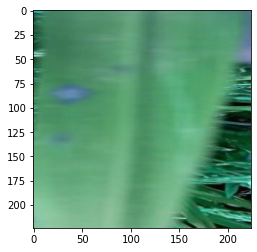

<Figure size 432x288 with 0 Axes>

SOURCE: class: bacterial_leaf_blight, file: bacterial_leaf_blight/blight_rotated_002.png
PREDICTED: class: Bacterial_leaf_blight, confidence: 0.909958


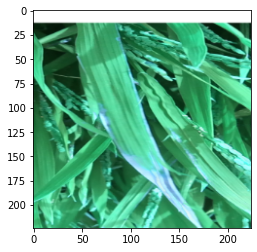

SOURCE: class: bacterial_leaf_blight, file: bacterial_leaf_blight/blight_rotated_007.jpg
PREDICTED: class: blast, confidence: 0.508139


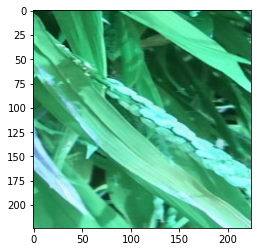

<Figure size 432x288 with 0 Axes>

SOURCE: class: blast, file: blast/blast_rotated_024.png
PREDICTED: class: Bacterial_leaf_blight, confidence: 0.834687


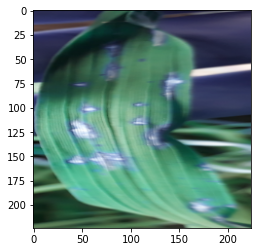

<Figure size 432x288 with 0 Axes>

SOURCE: class: blast, file: blast/blast_rotated_021.jpg
PREDICTED: class: blast, confidence: 0.450684


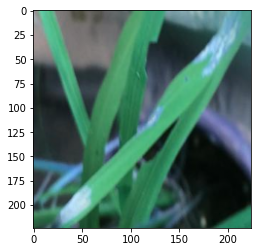

<Figure size 432x288 with 0 Axes>

In [ ]:
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))
    
    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)    
    plt.show()